In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as norm
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()
x = np.array(data.data)
y = np.array(data.target)
print(type(x))

<class 'numpy.ndarray'>


Data okunması ve arraye atanması.

In [12]:
mean_x = np.mean(x, axis=0)
std_x = np.std(x, axis=0)
X_norm = (x - mean_x) / std_x

mean_y = np.mean(y)
std_y = np.std(y)
Y_norm = (y - mean_y) / std_y

Z-Normalizasyon yapıldı verilere.

In [13]:
def cost_func(w,b,x_norm,y_norm,m):

    total_cost=0

    for i in range(m):

        f_wb=(np.dot(x_norm[i],w) +b)
        total_cost += ( f_wb - y_norm[i])**2

    total_cost=total_cost/(2*m)

    return total_cost


Burda muliple

In [14]:
def grand_div(w,b,x_norm,y_norm,m):

    f_wb = np.dot(x_norm, w) + b
    error = f_wb - y_norm
    dw = (1/m) * np.dot(x_norm.T, error)
    db = (1/m) * np.sum(error)

    return dw, db

In [15]:
def gradient_Decent(w,b,x_norm,y_norm,m,iterations,learning_rate):

    J_history = []

    for i in range(iterations):

        dw , db = grand_div(w,b,x_norm, y_norm, m)

        w = w - learning_rate * dw
        b = b - learning_rate * db

        cost = cost_func(w, b, x_norm, y_norm, m)
        J_history.append(cost)

        if len(J_history) > 1 and abs(J_history[-2] - J_history[-1]) < 1e-8:
            print("aaaaaaaaaa")
            break

        if i % (iterations // 10) == 0:
            pass
            #print(f"Iteration {i}: Cost = {cost:.4f}")
    return w,b,J_history



aaaaaaaaaa
b,w found by gradient descent: -0.00,[ 0.72066923  0.10331236 -0.23320186  0.26741161 -0.00377852 -0.03415092
 -0.77530578 -0.75006818] 
prediction: 1.79, target value: 2.129631481668038
prediction: 1.65, target value: 1.3141561369243353
prediction: 1.39, target value: 1.2586934142212567
prediction: 1.02, target value: 1.1651000696598115
prediction: 0.30, target value: 1.1728995150399322
prediction: 0.53, target value: 0.5446108594191197
prediction: 0.28, target value: 0.8002593468786227
prediction: 0.15, target value: 0.29936163246644404
prediction: -0.24, target value: 0.17197069125781012
prediction: 0.31, target value: 0.47008282578685795
prediction: 0.13, target value: 0.6468702544029208
prediction: 0.19, target value: 0.3028280526353864
prediction: 0.06, target value: 0.057578825682710374
prediction: 0.09, target value: -0.13480749369359335
prediction: -0.28, target value: -0.412987712251222
prediction: -0.18, target value: -0.579375880360458
prediction: -0.09, target v

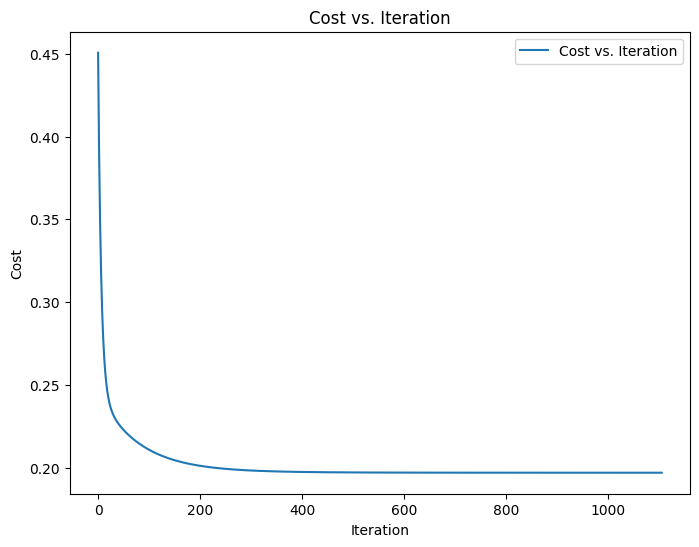

In [16]:
m=len(X_norm)
w = np.random.randn(X_norm[0].shape[0])*0.01
b = 0.0
iterations = 1000000000
learning_rate=0.08
w_final,b_final,J_hist=gradient_Decent(w,b,X_norm,Y_norm,m,iterations,learning_rate)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

m,_ = X_norm.shape
for i in range(m):
    print(f"prediction: {np.dot(X_norm[i], w_final) + b_final:0.2f}, target value: {Y_norm[i]}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(J_hist, label="Cost vs. Iteration")
ax.set_title("Cost vs. Iteration")
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost")
ax.legend()
plt.show()

In [17]:

def visualize_regression(X_norm, Y_norm, w_final, b_final, feature_index=0):
    """
    Belirli bir özellik için regresyon çizgisini ve training noktalarını görselleştirir

    Parameters:
    -----------
    X_norm : normalized feature matrix
    Y_norm : normalized target values
    w_final : fitted weights
    b_final : fitted bias
    feature_index : hangi feature'ın görselleştirileceği (0-7 arası)
    """
    # Scatter plot için veriyi hazırla
    x_feature = X_norm[:, feature_index]

    # Regresyon çizgisi için noktaları hazırla
    x_line = np.linspace(min(x_feature), max(x_feature), 100)
    y_line = w_final[feature_index] * x_line + b_final

    # Görselleştirme
    plt.figure(figsize=(12, 8))

    # Training noktalarını çiz
    plt.scatter(x_feature, Y_norm, color='blue', alpha=0.5, label='Eğitim verileri')

    # Regresyon çizgisini çiz
    plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Regresyon çizgisi (w={w_final[feature_index]:.2f}, b={b_final:.2f})')

    plt.title('California Housing Regresyon Analizi')
    plt.xlabel(f'Normalize Edilmiş Feature {feature_index}')
    plt.ylabel('Normalize Edilmiş Ev Fiyatı')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Residual plot (artık değerler)
    plt.figure(figsize=(12, 4))
    predictions = np.dot(X_norm, w_final) + b_final
    residuals = Y_norm - predictions
    plt.scatter(predictions, residuals, color='green', alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
    plt.title('Artık Değerler Grafiği')
    plt.xlabel('Tahmin Edilen Değerler')
    plt.ylabel('Artık Değerler')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Her bir feature için ayrı görselleştirme
def plot_all_features(X_norm, Y_norm, w_final, b_final):
    """Tüm özellikleri ayrı grafiklerde görselleştirir"""
    n_features = X_norm.shape[1]
    rows = (n_features + 1) // 2

    plt.figure(figsize=(15, 5*rows))

    for i in range(n_features):
        plt.subplot(rows, 2, i+1)
        x_feature = X_norm[:, i]

        # Scatter plot
        plt.scatter(x_feature, Y_norm, color='blue', alpha=0.5, s=20)

        # Regresyon çizgisi
        x_line = np.linspace(min(x_feature), max(x_feature), 100)
        y_line = w_final[i] * x_line + b_final
        plt.plot(x_line, y_line, color='red', linewidth=2)

        plt.title(f'Feature {i} vs Target')
        plt.xlabel(f'Normalize Feature {i}')
        plt.ylabel('Normalize Hedef')
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

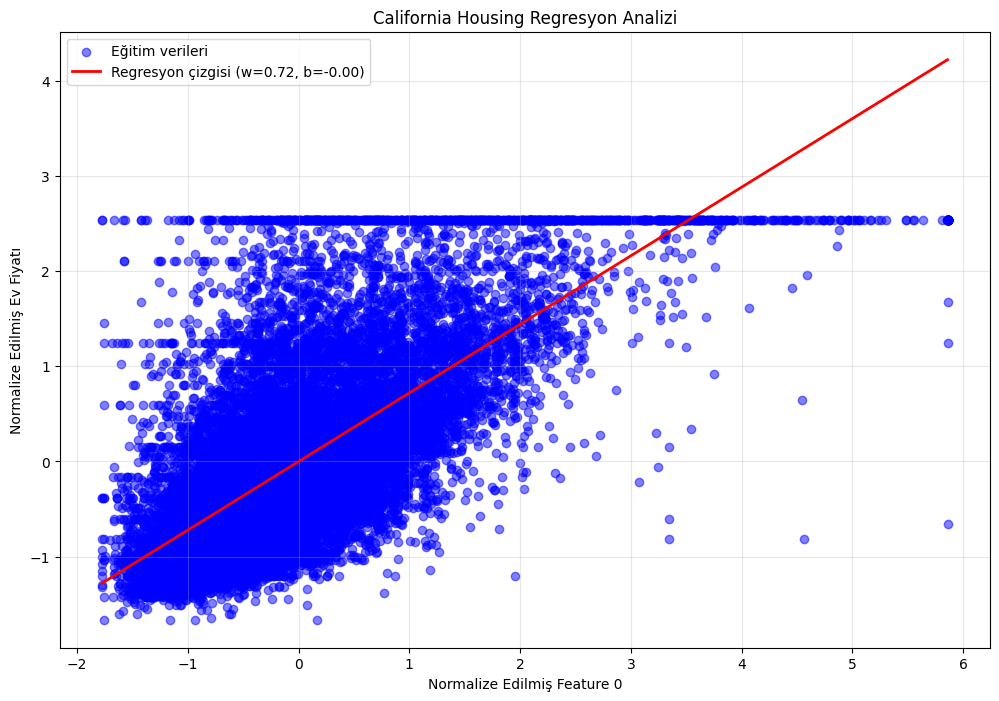

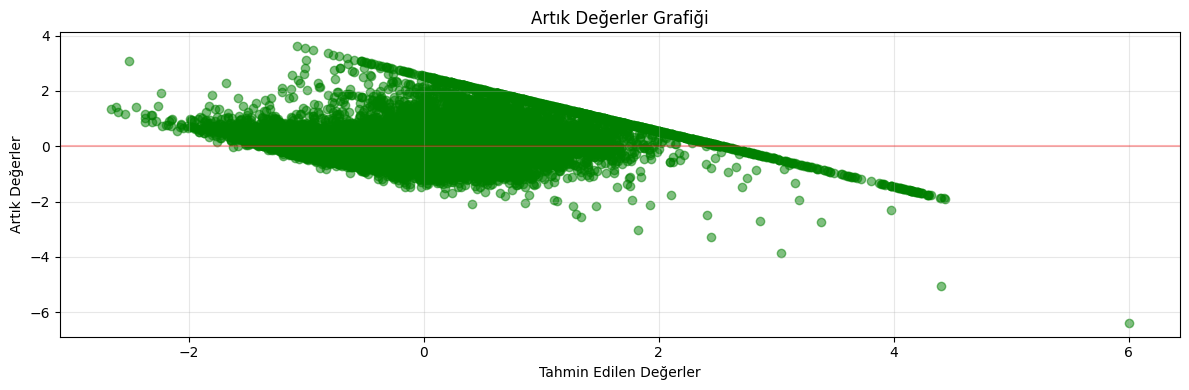

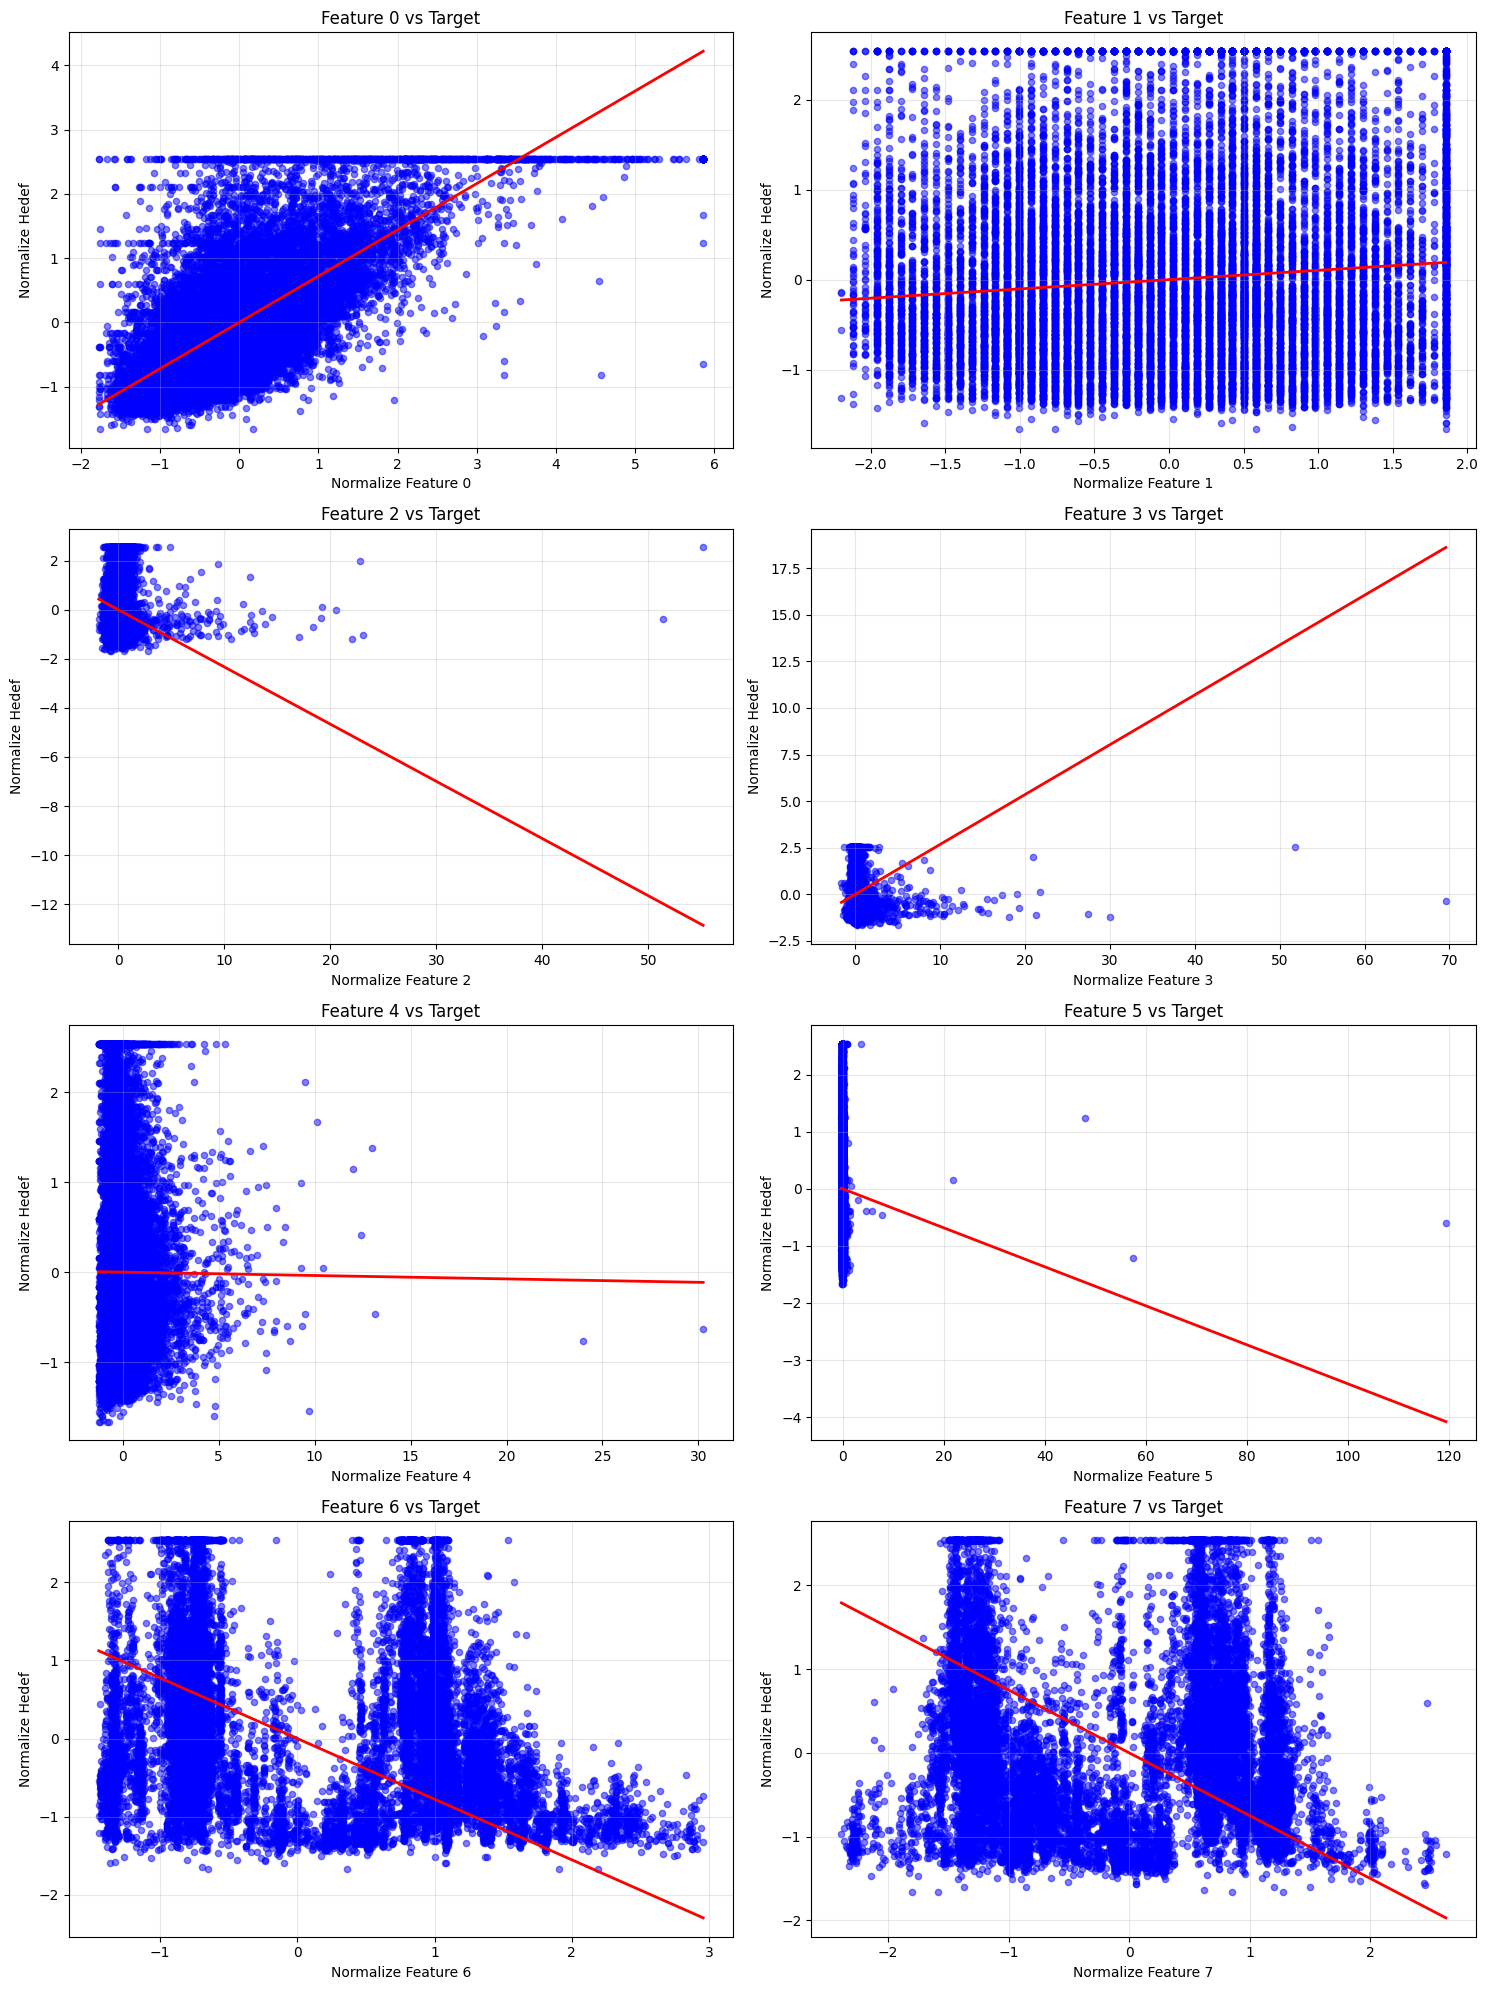

In [18]:
# Tek bir özellik için detaylı görselleştirme
visualize_regression(X_norm, Y_norm, w_final, b_final, feature_index=0)

# Tüm özelliklerin görselleştirmesi
plot_all_features(X_norm, Y_norm, w_final, b_final)